In [126]:
#install.packages("RCurl", repos="http://cran.r-project.org")
# api key sWyMx5Thd3sPhF613nE6
library(Quandl)
library(RCurl)
library(httr)
library(stats)
library(zoo)
set_config( config( ssl_verifypeer = 0L ) )
Quandl.api_key('sWyMx5Thd3sPhF613nE6')

In [145]:
us_euro <- Quandl("FRED/EXUSEU", collapse = 'monthly')
us_euro$DATE <- as.yearmon(us_euro$DATE)

us_gdp <- Quandl("FRED/GDP", start_date = '1999-01-31')
us_gdp$DATE <- as.yearmon(us_gdp$DATE)

us_infl <- Quandl("FRBC/USINFL", start_date = '1999-01-01')
us_infl$Date <- as.yearmon(us_infl$Date)
# Extracts the year to year inflation rate
us_infl2 <- us_infl[,c(1,7)]
colnames(us_infl2) <- c('DATE','USInfl')


df <- Reduce(function(...) merge(..., by='DATE', all=TRUE), 
    list(us_gdp, us_euro, us_infl2))
#df <- merge(c(us_gdp,us_euro,us_infl2),by='DATE',all=TRUE)

colnames(df) <- c('Date','USGDP','USD_EUR','USInfl')
df$USGDP <- na.spline(df$USGDP)

head(df)

,Date,USGDP,USD_EUR,USInfl
1,Jan 1999,9662.398,1.1591,2.39486
2,Feb 1999,9587.966,1.1203,2.091807
3,Mar 1999,9554.9,1.0886,2.085747
4,Apr 1999,9557,1.0701,2.196532
5,May 1999,9588.067,1.063,2.021953
6,Jun 1999,9641.9,1.0377,2.080925


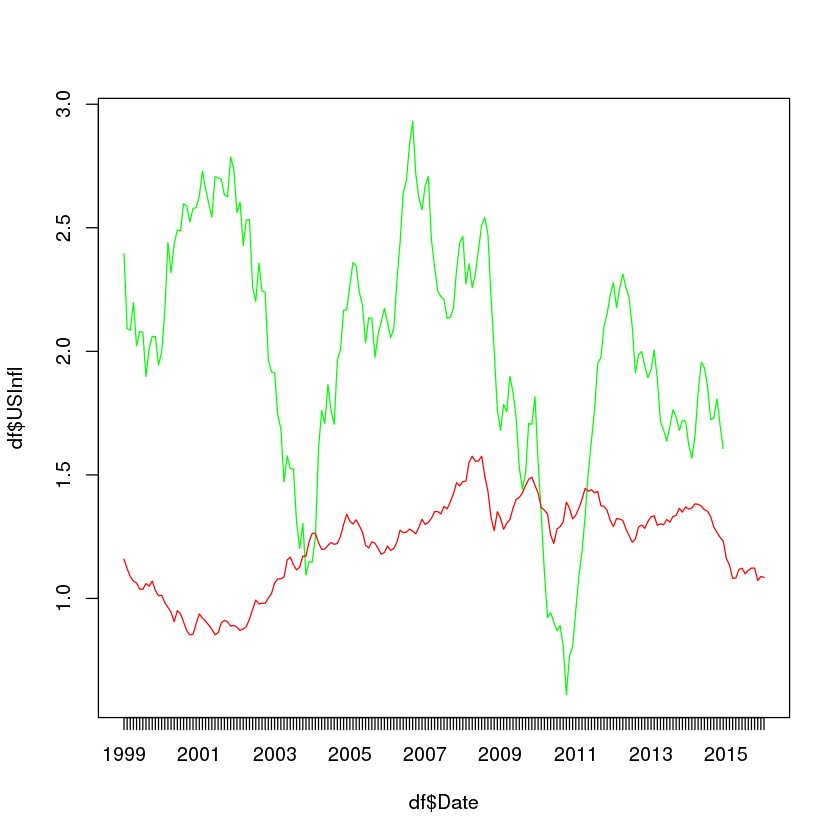

In [155]:
plot(df$Date,df$USInfl,type='l',col='green')
lines(df$Date,df$USD_EUR,type='l',col='red')

In [147]:
help(plot)

plot {graphics},R Documentation
x,"the coordinates of points in the plot. Alternatively, a single plotting structure, function or any R object with a plot method can be provided."
y,"the y coordinates of points in the plot, optional if x is an appropriate structure."
...,"Arguments to be passed to methods, such as graphical parameters (see par). Many methods will accept the following arguments: typewhat type of plot should be drawn. Possible types are ""p"" for points, ""l"" for lines, ""b"" for both, ""c"" for the lines part alone of ""b"", ""o"" for both ‘overplotted’, ""h"" for ‘histogram’ like (or ‘high-density’) vertical lines, ""s"" for stair steps, ""S"" for other steps, see ‘Details’ below, ""n"" for no plotting. All other types give a warning or an error; using, e.g., type = ""punkte"" being equivalent to type = ""p"" for S compatibility. Note that some methods, e.g. plot.factor, do not accept this. mainan overall title for the plot: see title. suba sub title for the plot: see title. xlaba title for the x axis: see title. ylaba title for the y axis: see title. aspthe y/x aspect ratio, see plot.window."
